In [1]:
import math

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

import os

from cascid.configs import pad_ufes
from cascid import image_preprocessing, image_sampling


In [3]:
METADATA = "../../../data/PAD-UFES/metadata.csv"
IMAGES = "../../../data/PAD-UFES/images/"

In [4]:
df = pd.read_csv(METADATA)
hair_ids = [
    "PAT_691", "PAT_320", "PAT_109", "PAT_356", "PAT_681", "PAT_167",
    "PAT_2109", "PAT_245", "PAT_633"
]
df_hair_test = df[df["patient_id"].isin(hair_ids)]

In [5]:
def load_selected_img(n):
    filename = df_hair_test['img_id'].iloc[n]
    filename = IMAGES +  filename
    img = cv2.imread(filename)[:,:,::-1]
    return img

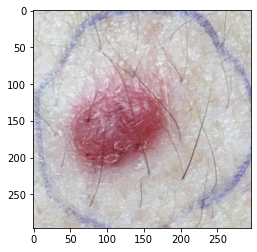

In [6]:
plt.imshow(load_selected_img(10))
plt.show()

# Hair removal

In [10]:
def show_all_hair_preprocessimg(img):
    dst  = image_preprocessing.remove_hairs(img)
    dst_lab = image_preprocessing.remove_hairs_lab_lchannel(img)

    dst_hessian_black  = image_preprocessing.remove_black_hairs_hessian(img)
    dst_hessian_white  = image_preprocessing.remove_white_hairs_hessian(img)

    dst_hessian_black_white  = image_preprocessing.remove_white_hairs_hessian(dst_hessian_black)
    dst_hessian_white_black  = image_preprocessing.remove_black_hairs_hessian(dst_hessian_white)

    dst_hessian_lab = image_preprocessing.remove_hairs_lab_gaussian(img)

    dst_dog = image_preprocessing.remove_hairs_dog(img)

    imgs_list = [img, dst, dst_lab, dst_hessian_black, dst_hessian_white, dst_hessian_black_white, dst_hessian_white_black, dst_hessian_lab, dst_dog]

    image_sampling.image_grid(imgs_list,1)

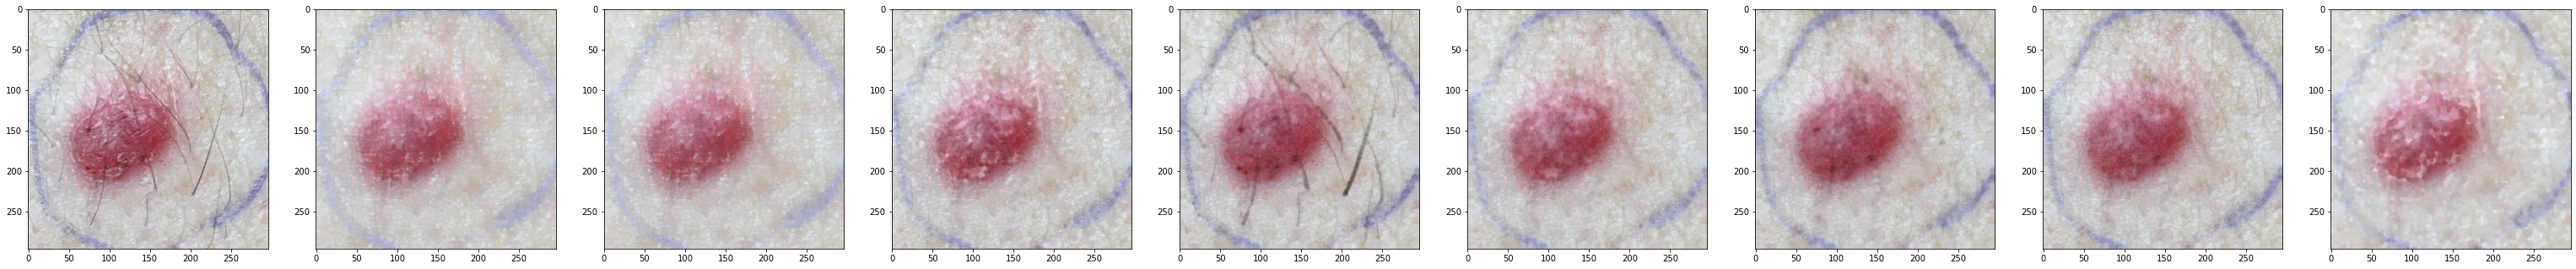

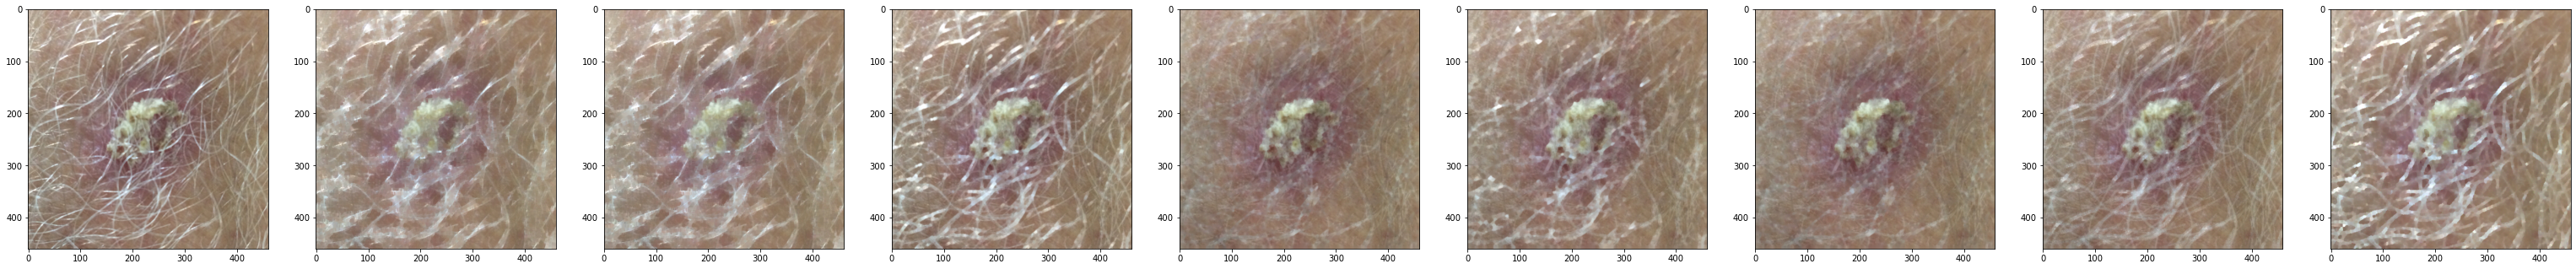

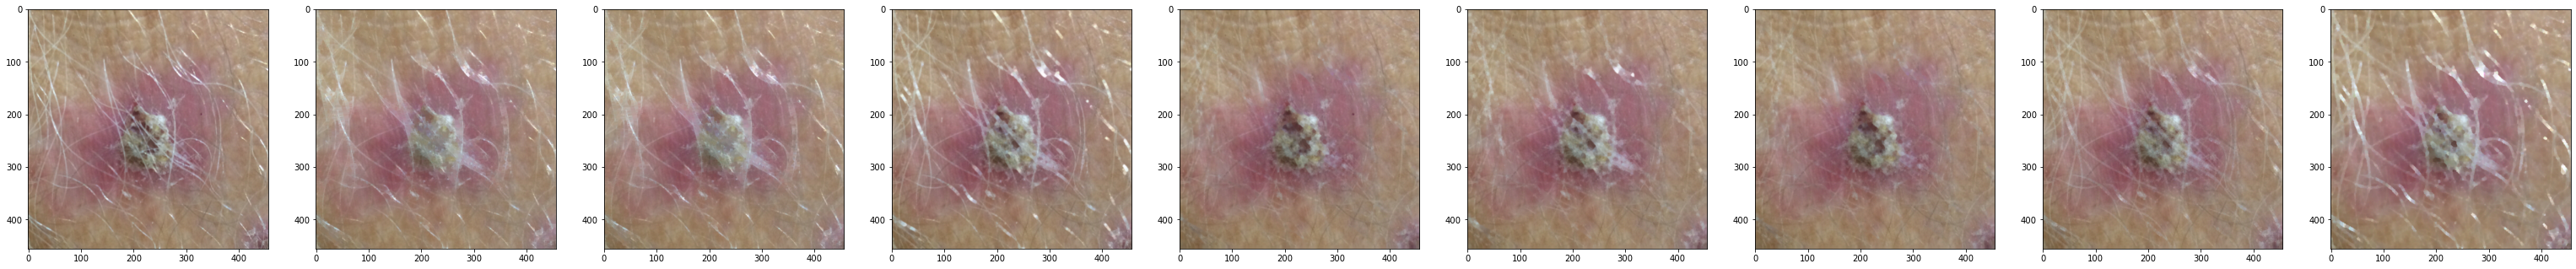

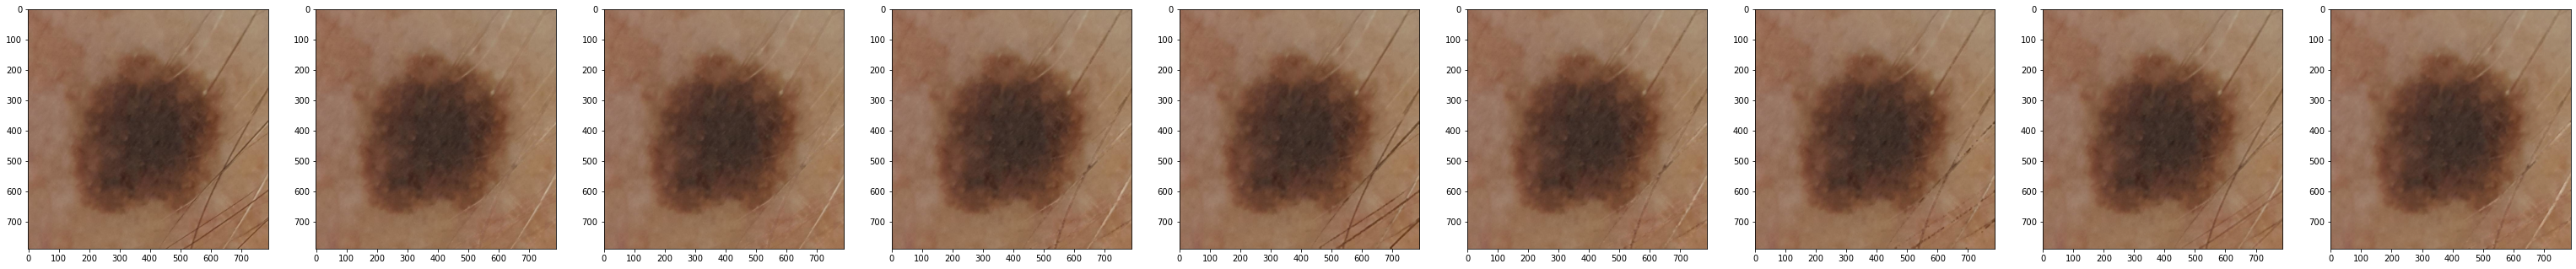

In [11]:
img = load_selected_img(10)
img2 = load_selected_img(0)
img3 = load_selected_img(4)
img4 = load_selected_img(7)

show_all_hair_preprocessimg(img)
show_all_hair_preprocessimg(img2)
show_all_hair_preprocessimg(img3)
show_all_hair_preprocessimg(img4)

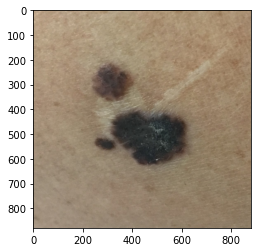

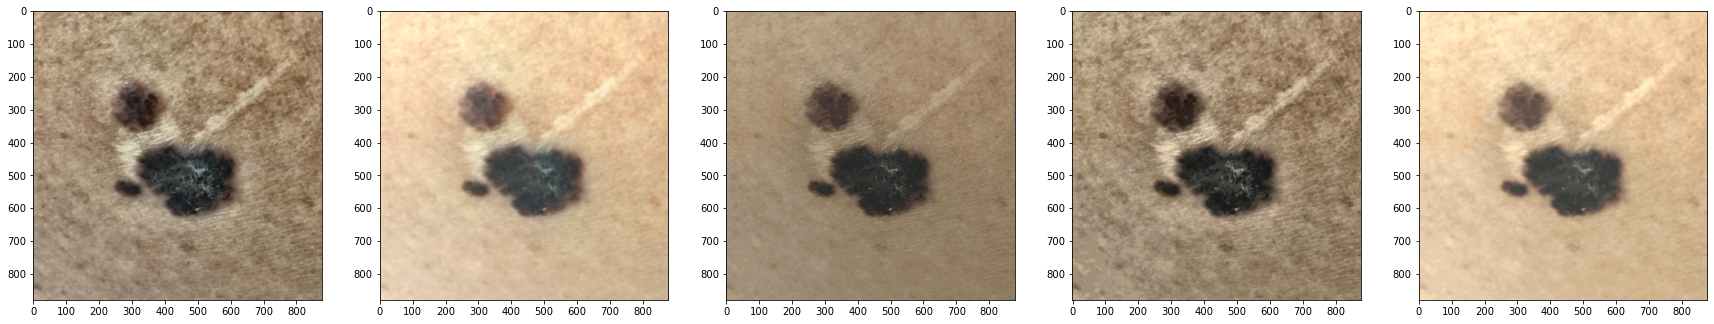

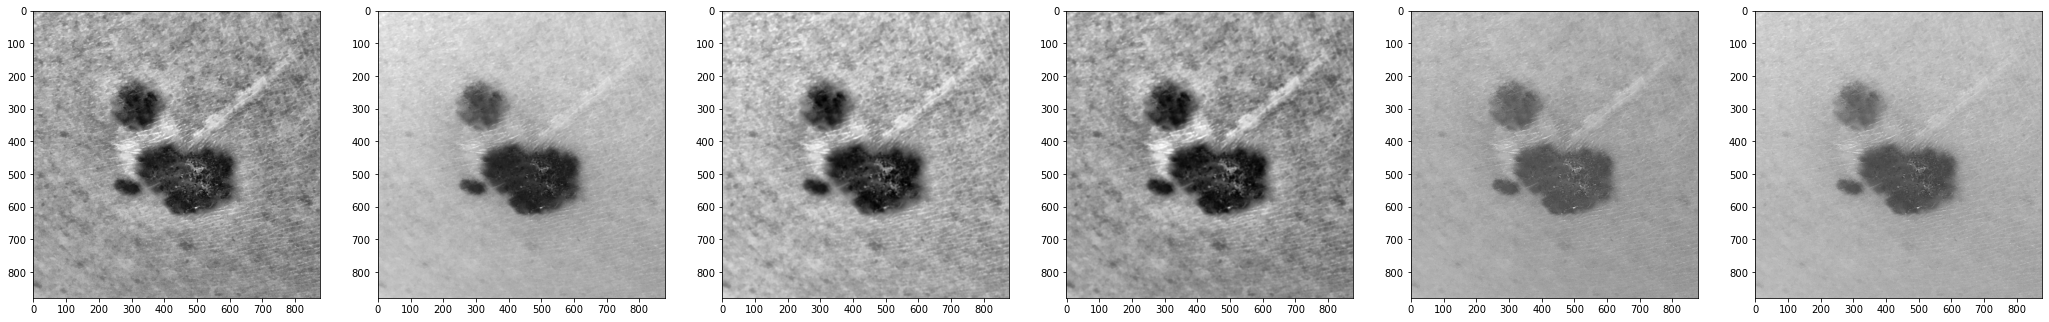

In [12]:
filename = "PAT_995_1867_5.png"
filename = IMAGES +  filename
img = (cv2.imread(filename)[:,:,::-1]).astype(np.uint8)
plt.imshow(img)
plt.show()

img_simple_processing_clahe = image_preprocessing.simple_processing_clahe(img)

processed_img_article  = image_preprocessing.preprocessing_article(img)
img_preprocessing_article_histeq = image_preprocessing.preprocessing_article_histeq(img)

processed_lab_histeq = image_preprocessing.preprocessing_lab_histeq(img)
processed_lab_histeq_grey = image_preprocessing.preprocessing_lab_histeq_grey(img)

processed_img_contrast_ab = image_preprocessing.enhance_contrast_ab(img)

processed_img_unsharp_masking = image_preprocessing.unsharp_masking(img)
processed_img_red_band_unsharp = image_preprocessing.red_band_unsharp(img)
processed_img_color_quantization = image_preprocessing.color_quantization(img)

processed_img_contrast_ab_quant = image_preprocessing.enhance_contrast_ab(processed_img_color_quantization)
processed_lab_histeq_quant = image_preprocessing.preprocessing_lab_histeq(processed_img_color_quantization)


colored = [processed_lab_histeq, processed_img_contrast_ab, processed_img_color_quantization, processed_lab_histeq_quant, processed_img_contrast_ab_quant]
gray = [img_simple_processing_clahe, processed_img_article, img_preprocessing_article_histeq, processed_lab_histeq_grey, processed_img_unsharp_masking, processed_img_red_band_unsharp]

image_sampling.image_grid(colored,1)
image_sampling.image_grid(gray,1)


In [30]:
DEST_DIR = "../../../preprocessed_hair/"

In [11]:
all_images = os.listdir(IMAGES)
all_images

['PAT_1000_31_620.png',
 'PAT_1006_53_385.png',
 'PAT_1006_53_716.png',
 'PAT_1008_59_297.png',
 'PAT_100_393_595.png',
 'PAT_100_393_898.png',
 'PAT_1013_82_876.png',
 'PAT_1014_85_22.png',
 'PAT_1014_86_861.png',
 'PAT_1017_97_577.png',
 'PAT_1018_107_68.png',
 'PAT_1019_110_194.png',
 'PAT_101_1041_651.png',
 'PAT_101_1041_658.png',
 'PAT_101_1041_898.png',
 'PAT_1020_111_593.png',
 'PAT_1021_112_40.png',
 'PAT_1022_114_756.png',
 'PAT_1022_115_132.png',
 'PAT_1026_124_206.png',
 'PAT_1026_124_346.png',
 'PAT_1027_128_854.png',
 'PAT_1029_135_239.png',
 'PAT_1029_135_983.png',
 'PAT_1031_148_29.png',
 'PAT_1031_148_292.png',
 'PAT_1031_148_66.png',
 'PAT_1033_153_301.png',
 'PAT_1034_160_819.png',
 'PAT_1034_161_203.png',
 'PAT_1035_165_800.png',
 'PAT_1036_169_687.png',
 'PAT_1042_187_746.png',
 'PAT_1046_203_511.png',
 'PAT_104_1754_276.png',
 'PAT_104_1755_320.png',
 'PAT_104_1756_151.png',
 'PAT_1051_220_356.png',
 'PAT_1057_242_297.png',
 'PAT_1061_254_813.png',
 'PAT_1062_264_

In [ ]:
for img in all_images:  
    image_sampling.save_preprocessed_imgs(str(pad_ufes.IMAGES_DIR / img), image_preprocessing.remove_hairs, str(DEST_DIR + img))

In [12]:
def folder_to_list(src_dir, ):

    imgs_list = []
    for f in os.listdir(src_dir):
        if f.endswith(".png"):
            print(f)
            filename = src_dir+f
            img = cv2.imread(filename)[:,:,::-1]
            imgs_list.append((img,f))

    return imgs_list


In [14]:
imgs_list = folder_to_list("../../../preprocessed_hair/")

PAT_1000_31_620.png
PAT_1006_53_385.png
PAT_1006_53_716.png
PAT_1008_59_297.png
PAT_100_393_595.png
PAT_100_393_898.png
PAT_1013_82_876.png
PAT_1014_85_22.png
PAT_1014_86_861.png
PAT_1017_97_577.png
PAT_1018_107_68.png
PAT_1019_110_194.png
PAT_101_1041_651.png
PAT_101_1041_658.png
PAT_101_1041_898.png
PAT_1020_111_593.png
PAT_1021_112_40.png
PAT_1022_114_756.png
PAT_1022_115_132.png
PAT_1026_124_206.png
PAT_1026_124_346.png
PAT_1027_128_854.png
PAT_1029_135_239.png
PAT_1029_135_983.png
PAT_1031_148_29.png
PAT_1031_148_292.png
PAT_1031_148_66.png
PAT_1033_153_301.png
PAT_1034_160_819.png
PAT_1034_161_203.png
PAT_1035_165_800.png
PAT_1036_169_687.png
PAT_1042_187_746.png
PAT_1046_203_511.png
PAT_104_1754_276.png
PAT_104_1755_320.png
PAT_104_1756_151.png
PAT_1051_220_356.png
PAT_1057_242_297.png
PAT_1061_254_813.png
PAT_1062_264_741.png
PAT_1063_268_704.png
PAT_1063_268_919.png
PAT_1063_269_755.png
PAT_1063_270_593.png
PAT_1063_271_448.png
PAT_1064_272_668.png
PAT_1064_273_980.png
PAT_106

In [16]:
len(imgs_list)

2298

In [19]:
dest_dir = "../../../preprocessed_hair/hairless_imgs.pickle"
with open(dest_dir,"wb") as dest:
    pickle.dump(imgs_list,dest) 

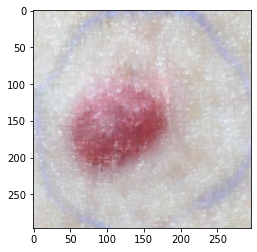

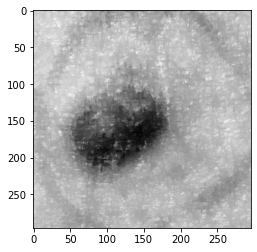

In [23]:
def article_preprocessing_detection(img):
    # https://d1wqtxts1xzle7.cloudfront.net/53555135/IRJET-V4I4702-with-cover-page-v2.pdf?Expires=1663115000&Signature=BI2BBKZ~yuX4ver3~9ZohDWBatKfwMmrf0SCaHJhS-I-h7SCWMG~n4p~kNvoM-IMFfVcEJUSN4L04rWQa~zuJhVjYRY7zFju6izNn00JVFCm5Stm4H-amxklwDcZO7V7Qov~LZQkjBaqQlAsIQF5PYVuCwhqS~cLW1NBFolzFTxGmFIaF5oYymW0uzftpJYS894Q~zIQTeyMTwtaXJmDEUxfy-Pe-QFNQE2SzZQeZXMWf8B~Jj~k1OBynHay75C~aT08TRBDQ8hBDgz18yfUb0IXDpUVDhGHQ-WZnmLmdgkL8oREocL23cbok8Z8dvfivOMFB6Ip18zdSQlTTd-6OA__&Key-Pair-Id=APKAJLOHF5GGSLRBV4ZA

    (R,G,B) = cv2.split(img)
    new_gray = 0.299*R + 0.587*G + 0.114*B
    return new_gray
   
plt.imshow(dst)
plt.show()
plt.imshow(article_preprocessing_detection(dst),cmap="gray")